##  Visualizing a GuanoFile

#### Guano metadata is great for interoperability and data sharing.  But what if we want to visualize the actual contents of an given file?

##### Load up a bat call (This one happens to be a myotis myotis obtained from batcalls.com)

In [1]:
# abailable from: http://www.batcalls.com/europe/playback/Myotis_myotis_1_o.wav
fname = r"C:\Users\talbertc\Downloads\Myotis_myotis_1_o.wav"
from guano import GuanoFile
g = GuanoFile(fname)

#### Imports from the Scipy and Mpl stacks

In [2]:
import numpy as np
from scipy import signal

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
from matplotlib.ticker import LogFormatter 



### Convience function for making a plot of a single file.
#### This should be extended to allow for more flexibility in setting the time to display, add options for denoising, clean up, etc.

#### What would also be cool would be to implement this in the pyviz stack for interactivity.

In [3]:
def plot_guano(guano_file, figsize=(15, 7), cm=plt.cm.gist_heat, startsec=0, endsec=None):
    """ Return a visualization of a guano files spectral content
    """
    fig, ax_spec = plt.subplots(figsize=figsize)

    data = np.frombuffer(guano_file.wav_data, 'int16')
    framerate = guano_file.wav_params.framerate
    if endsec is None:
        endsec = guano_file.wav_params.nframes / framerate
    data_subset =  data[int(startsec*framerate):int(endsec*framerate)]
    
    f, t, Sxx = signal.spectrogram(data_subset, guano_file.wav_params.framerate)

    vmax = Sxx.max()
    vmin = vmax / 1.e5
    im = ax_spec.pcolormesh(t+startsec, f, Sxx, norm=LogNorm(vmin=vmin, vmax=vmax),
                   cmap=cm, )

    ax_spec.set_ylabel('Frequency [Hz]')
    ax_spec.set_xlabel('Time [sec]')

    divider = make_axes_locatable(ax_spec)
    ax_oscill = divider.append_axes("top", 1.2, pad=0.1, sharex=ax_spec)
    cax1 = divider.append_axes("right", size="2%", pad="0%")
    cb = plt.colorbar(im, cax=cax1)


    # make some labels invisible
    ax_oscill.xaxis.set_tick_params(labelbottom=False)
    ax_oscill.yaxis.set_tick_params(labelleft=False)
    
    t = np.linspace(startsec, endsec, 3000)
    
    ax_oscill.plot(t, data_subset[np.linspace(0, len(data_subset)-1, 3000).squeeze().astype(int)])
    ax_oscill.set_ylabel('Relative\nAmplitude')

    ax_oscill.set_title(f"Sonogram: {g.filename}", fontsize=16)

    ax_spec.set_xlim(startsec, endsec)
    
    return fig


    


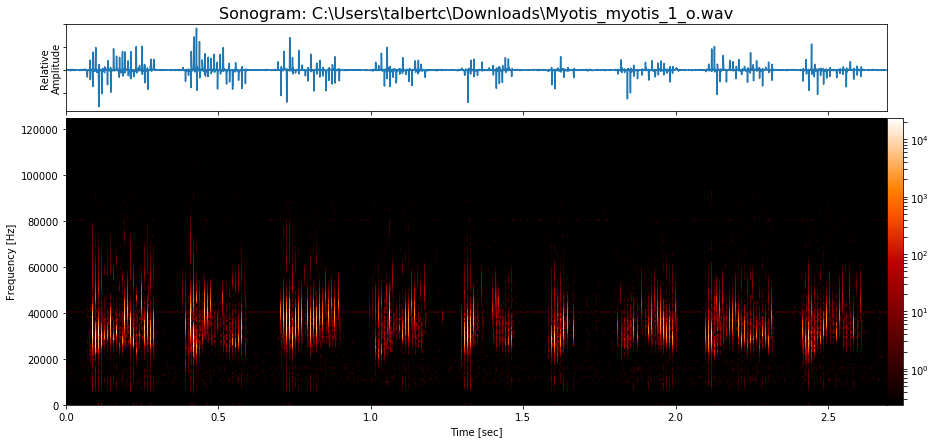

In [4]:
fig = plot_guano(g)

#### You can change the plot size

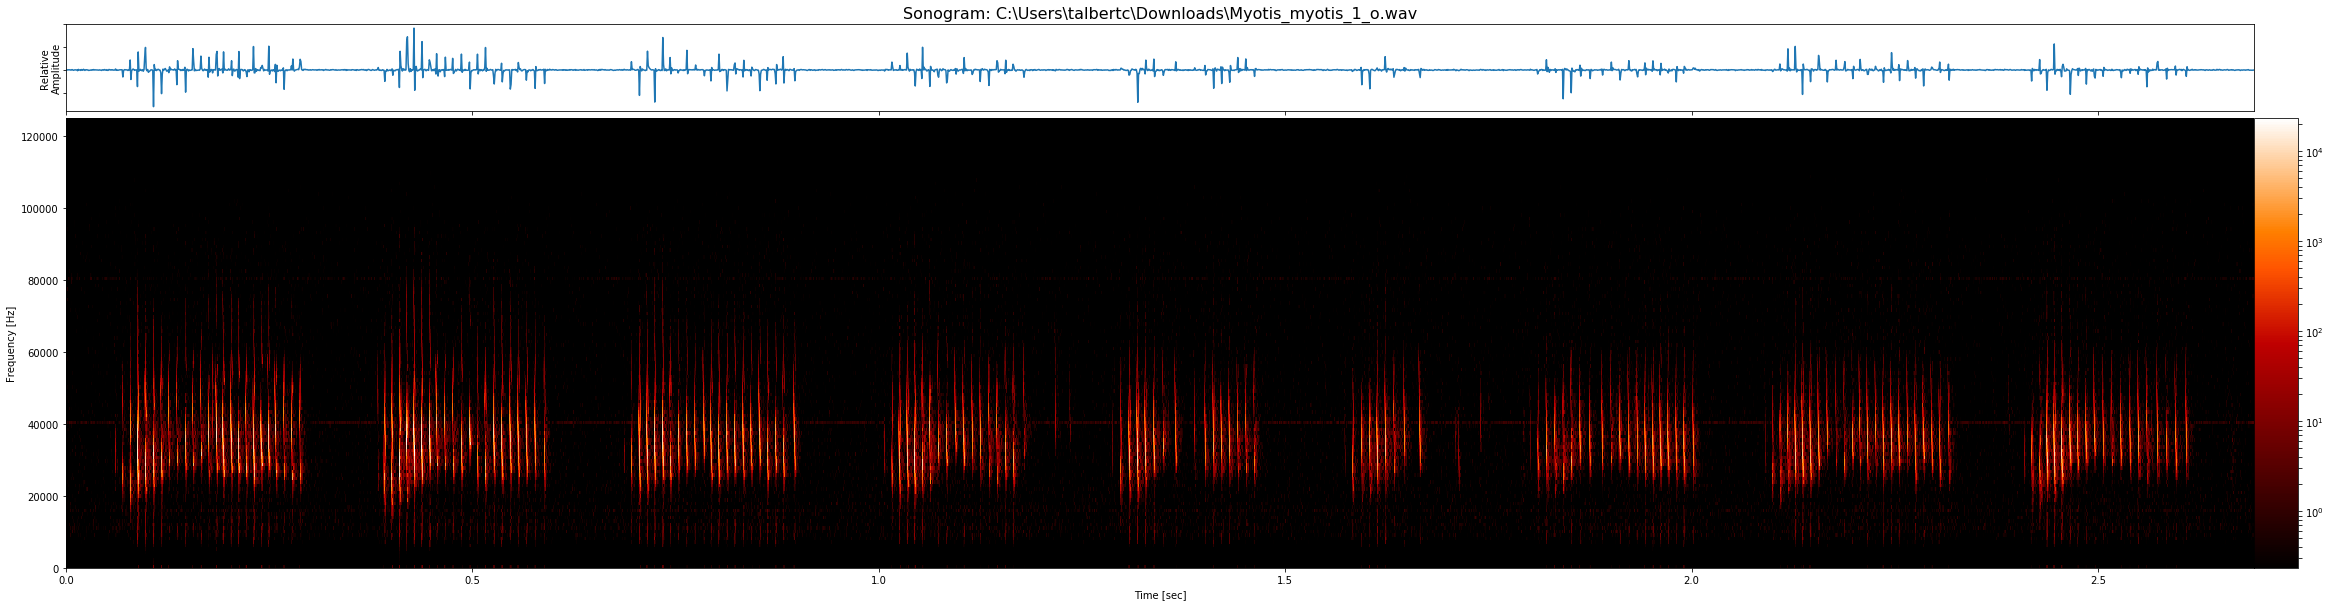

In [5]:
fig1 = plot_guano(g, figsize=(40, 10))

### This is how you would change the colormap

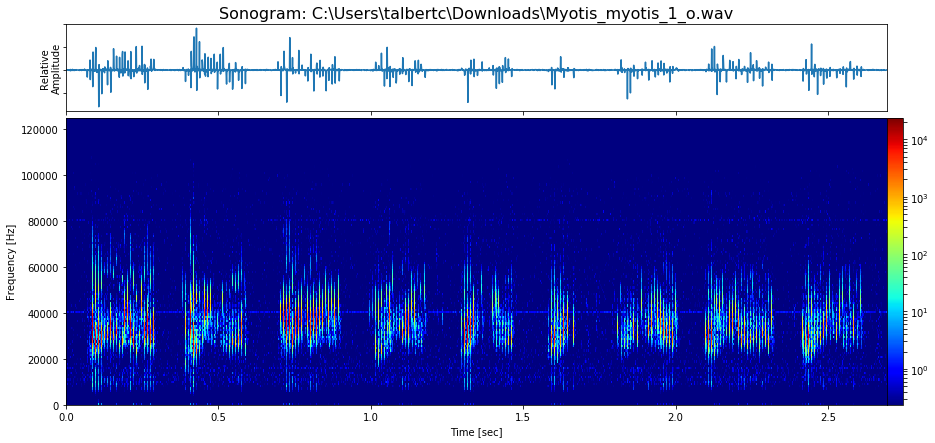

In [6]:
# because who doesn't love jet?
fig2 = plot_guano(g, cm=plt.cm.jet)

### This is how you would zoom in

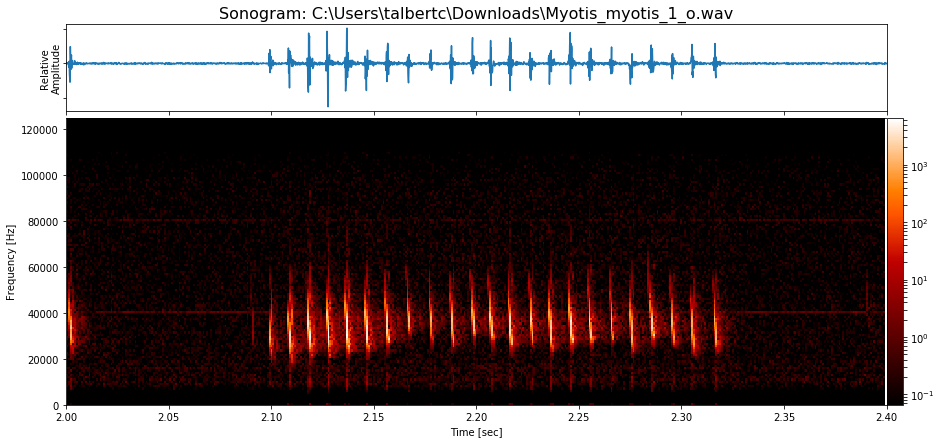

In [7]:
fig = plot_guano(g, startsec=2, endsec=2.4)